<a href="https://colab.research.google.com/github/hamzabinashraf/Hand-Written-Digits-Detection-using-Deep-Learning/blob/main/Hand_Written_Digits_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from google.colab import files
from PIL import Image, ImageOps

In [2]:
gpu_abailable = tf.config.list_physical_devices("GPU")
if gpu_abailable:
  print("GPU is available")
else:
  print("GPU is not available")

GPU is available


In [3]:
#load data
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [11]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8948 - loss: 0.3276 - val_accuracy: 0.9831 - val_loss: 0.0501
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9843 - loss: 0.0499 - val_accuracy: 0.9881 - val_loss: 0.0357
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9889 - loss: 0.0341 - val_accuracy: 0.9910 - val_loss: 0.0299
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0228 - val_accuracy: 0.9890 - val_loss: 0.0353
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9934 - loss: 0.0200 - val_accuracy: 0.9893 - val_loss: 0.0338
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9951 - loss: 0.0151 - val_accuracy: 0.9909 - val_loss: 0.0316
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9956 - loss: 0.0133 - val_accuracy: 0.9925 - val_loss: 0.0286
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9966 - loss: 0.0107

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9889 - loss: 0.0440
Test accuracy: 0.9911999702453613


In [22]:

def preprocessing_image(image):
    image = image.convert('L')
    image = ImageOps.expand(image, border=10, fill=0)
    image = image.resize((28, 28))
    image = np.array(image).astype('float32') / 255.0
    image = np.expand_dims(image, axis=-1)
    image = np.expand_dims(image, axis=0)
    return image

In [26]:
uploaded = files.upload()

Saving image2.png to image2.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


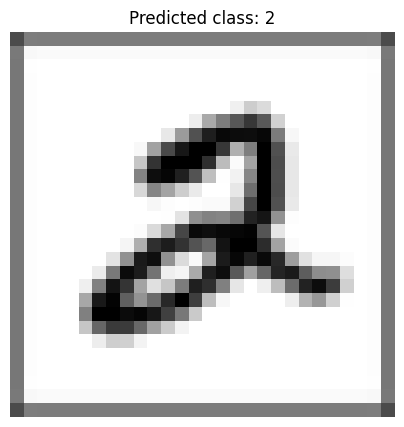

In [27]:
for fn in uploaded.keys():
  image = Image.open(fn)
  processed_image = preprocessing_image(image)
  prediction = model.predict(processed_image)
  predicted_class = np.argmax(prediction)

  plt.figure(figsize=(5,5))
  plt.imshow(processed_image[0].reshape(28,28), cmap = 'gray')
  plt.title(f'Predicted class: {predicted_class}')
  plt.axis('off')
  plt.show()